In [1036]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1037]:
#чтение файла
df = pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [1038]:
#проверка наличия пустых ячеек
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

# Часть 1 (8 баллов, по 2 на каждый вопрос).

1.1) Найдите количество спален(bedrooms) в самом дешёвом доме. Если таких несколько, укажите наименьшее значение.

In [1039]:
#находим самую дешевую цена на дом
min_price = min(df['price'])

#составляем список (Series) из домов с такой же минимальной ценой
list_of_the_cheapest = df.loc[df["price"] == min_price, "bedrooms"]

In [1040]:
# используем .min(), чтобы найти дом с самым маленьким числом спален
print("Минимальное число спален в самом дешевом доме:", list_of_the_cheapest.min(), "\nСтоимость дома:", min_price)

Минимальное число спален в самом дешевом доме: 2 
Стоимость дома: 1750000


1.2) Найдите количество домов, в которых количество спален НЕ больше количества ванных(bathrooms).


In [1041]:
print("Количество домов, в которых количество спален НЕ больше количества ванных:", len(df[df["bedrooms"] <= df['bathrooms']]))

Количество домов, в которых количество спален НЕ больше количества ванных: 15


1.3) Сколько стоит самый дешёвый дом с гостевой комнатой(guestroom)?

In [1042]:
#таблица хорошо отформатированна и все данные написаны в одном и том же регистре, это упрощает работу
guestroom_included = df[df['guestroom'] == "yes"]

guestroom_included

print("Стоимость самого дешевого дома с гостевой комнатой:", min(guestroom_included["price"]))

Стоимость самого дешевого дома с гостевой комнатой: 2450000


1.4) Рассмотрим дома ценой от 5.000.000 или до 2.000.000 денег. Какая часть из них может похвастаться кондиционированием воздуха(airconditioning)?

In [1043]:
# в pandas используется оператор "&" в качестве AND
# дома в категории "до 2 000 000"
cheap_filter = df[(df["price"] < 2000000) & (df['airconditioning'] == 'yes')]

# дома в категории "более 5 000 000"
expensive_filter = df[(df["price"] > 5000000) & (df['airconditioning'] == 'yes')]

In [1044]:
#используем len для подсчета количества записей
print("Количество домов с кодиционированием воздуха в категории 'до 2 миллионов':", len(cheap_filter))

print("Количество домов с кодиционированием воздуха в категории 'более 5 миллионов':", len(expensive_filter))

Количество домов с кодиционированием воздуха в категории 'до 2 миллионов': 0
Количество домов с кодиционированием воздуха в категории 'более 5 миллионов': 110


# Часть 2 (10 баллов).


Постройте график, на котором будут отмечены все квартиры в виде точек, у которых x координата это цена(price), а y - площадь(area). Отметьте разными цветами точки, которые соответствуют квартирам с разным количеством парковочных мест(parking). Не забывайте о прозрачности.

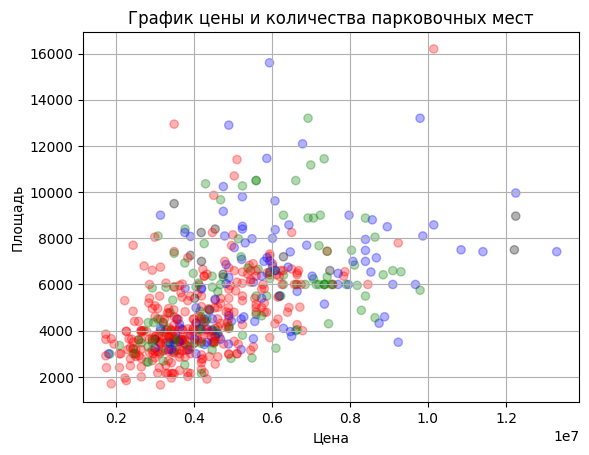

In [1045]:
#квартиры с разным количеством парковочных мест нужно отметить разным цветом, для этого нужен этот словарь
colors = {0: 'red', 1: 'green', 2: 'blue', 3: "black", 4: "yellow"}

plt.xlabel("Цена")
plt.ylabel("Площадь")
plt.grid()
plt.title("График цены и количества парковочных мест")

#этот список нужен для того, чтобы перевести данные из series в приемлемый для обработки вид
set_of_colors = [colors[parking] for parking in df['parking']]


plt.scatter(df["price"], df['area'], alpha = 0.3, color=set_of_colors)

# Часть 3 (20 баллов).

Постройте на одном поле 4 поля с графиками, на каждом из которых будут отмечены точки-квартиры, где x - цена, а y - площадь. На первом графике разными цветами отметьте наличие/отсутствие гостевой комнаты(guestroom), на втором - подвала(basement), на третьем - обогрева с помощью горячей воды(hotwaterheating) и на четвёртом - предбанника(prefarea). 

На графиках обязательно должны быть подписи осей, подпись графика(title), сетка, подписи с информацией о том, что обозначает каждый график. Дополнительная кастомизация крайне приветствуется.

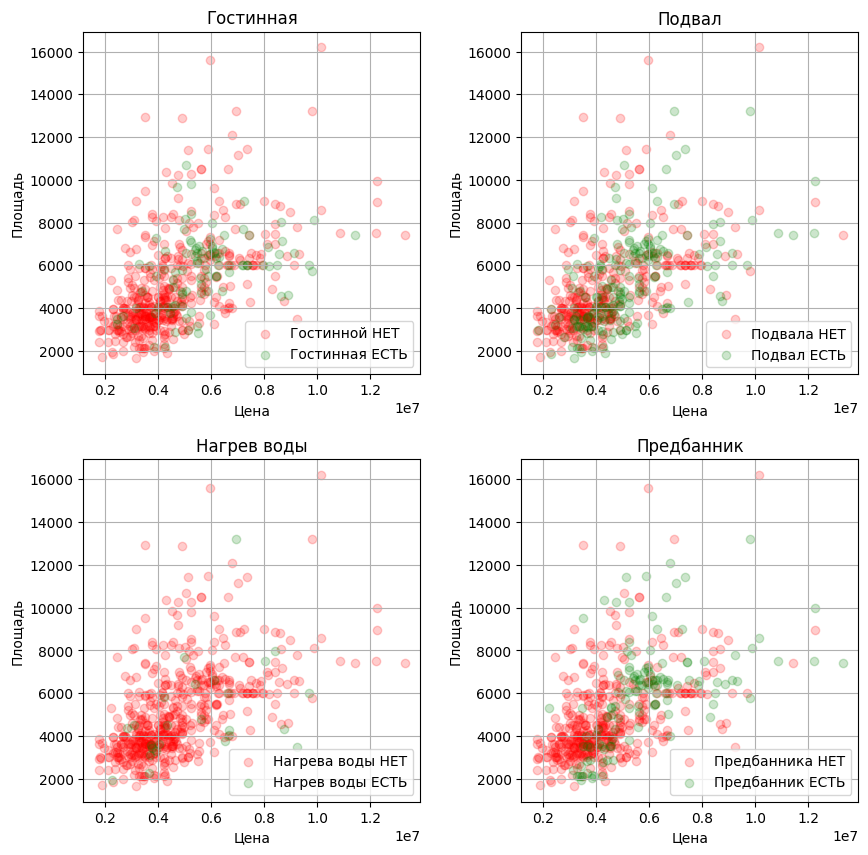

In [1046]:
#размер каждого графика
plt.figure(figsize=(10, 10))

#в этот раз наборы цветов не пригодятся, так как есть всего два варианта данных, "нет" и "да"

plt.subplot(2, 2, 1) #сетка графиков 2х2, 1 слот
plt.grid() #сетка
plt.xlabel("Цена")
plt.ylabel("Площадь")
plt.title("Гостинная") #название

#конструкция df[df["guestroom"] == "no"]["price"] выдает только цены тех домов, в которых нет гостевой комнаты
plt.scatter(df[df["guestroom"] == "no"]["price"], df[df["guestroom"] == "no"]['area'], alpha = 0.2, color="red", label="Гостинной НЕТ")
plt.scatter(df[df["guestroom"] == "yes"]["price"], df[df["guestroom"] == "yes"]['area'], alpha = 0.2, color="green", label="Гостинная ЕСТЬ")
#легенда
plt.legend()

plt.subplot(2, 2, 2)
plt.grid()
plt.xlabel("Цена")
plt.ylabel("Площадь")
plt.title("Подвал")
plt.scatter(df[df["basement"] == "no"]["price"], df[df["basement"] == "no"]['area'], alpha = 0.2, color="red", label="Подвала НЕТ")
plt.scatter(df[df["basement"] == "yes"]["price"], df[df["basement"] == "yes"]['area'], alpha = 0.2, color="green", label="Подвал ЕСТЬ")
plt.legend()

plt.subplot(2, 2, 3)
plt.grid()
plt.xlabel("Цена")
plt.ylabel("Площадь")
plt.title("Нагрев воды")
plt.scatter(df[df["hotwaterheating"] == "no"]["price"], df[df["hotwaterheating"] == "no"]['area'], alpha = 0.2, color="red", label="Нагрева воды НЕТ")
plt.scatter(df[df["hotwaterheating"] == "yes"]["price"], df[df["hotwaterheating"] == "yes"]['area'], alpha = 0.2, color="green", label="Нагрев воды ЕСТЬ")
plt.legend()

plt.subplot(2, 2, 4)
plt.grid()
plt.xlabel("Цена")
plt.ylabel("Площадь")
plt.title("Предбанник")
plt.scatter(df[df["prefarea"] == "no"]["price"], df[df["prefarea"] == "no"]['area'], alpha = 0.2, color="red", label="Предбанника НЕТ")
plt.scatter(df[df["prefarea"] == "yes"]["price"], df[df["prefarea"] == "yes"]['area'], alpha = 0.2, color="green", label="Предбанник ЕСТЬ")
plt.legend()


#настраивание расстояния между графиками
plt.subplots_adjust(wspace=0.3, hspace=0.25)

# Часть 4 (12 баллов).

Постройте 2 гистограммы распределения цены на одном графике. Одна должна соответствовать домам с наличием кондиционирования(airconditioning), а другой с отсутствием. Одна гистограмма может частично закрывать другую и данных может быть невидно. Решите эту проблему. График гистограмм должен быть оформлен не хуже предыдущих графиков.

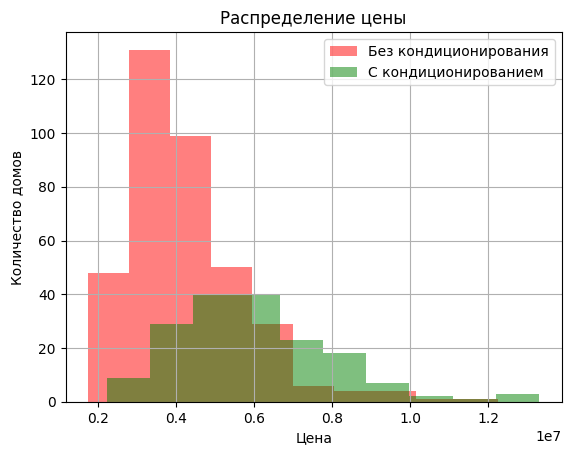

In [1047]:
plt.grid()
plt.xlabel('Цена')
plt.ylabel('Количество домов')
plt.title('Распределение цены')

# Строим две гистограммы с разными цветами и прозрачностью
plt.hist(df[df['airconditioning'] == 'no']['price'], bins=10, color='red', alpha=0.5, label='Без кондиционирования')
plt.hist(df[df['airconditioning'] == 'yes']['price'], bins=10, color='green', alpha=0.5, label='С кондиционированием')

# Добавляем легенду
plt.legend()

plt.show()
